##### Import our dependencies

In [37]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

##### import the input dataset

In [38]:
#  Import and read the charity_data.csv.

application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [39]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(["EIN"], axis =1)

##### Determine the number of unique values in each column

In [40]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [41]:
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

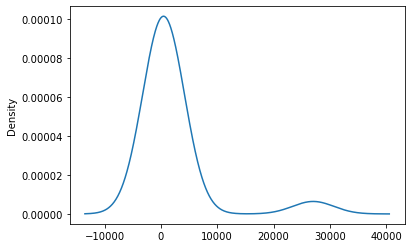

In [42]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [43]:
# Determine which values to replace if counts are less than ...? less than 500
replace_appliaction = list(application_counts[application_counts<500].index)

# Replace in dataframe
for app in replace_appliaction:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [44]:
# Look at CLASSIFICATION value counts for binning
class_counts =application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [45]:
# Determine which values to replace if counts are less than 1000..?
replace_class = list(class_counts[class_counts<1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [46]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE              9
AFFILIATION                   6
CLASSIFICATION                6
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [47]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


#### bin Names

In [48]:
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

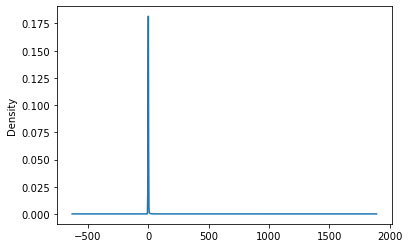

In [49]:
# Visualize the value counts of name
name_counts.plot.density()

In [50]:
# Determine which values to replace if counts are less than 1..?
replace_application = list(name_counts[name_counts <= 1].index)

# Replace in dataframe
for app in replace_application:
    application_df['NAME'] = application_df['NAME'].replace(app,"No Repeat")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

No Repeat                                                             18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [51]:
#USe the bucket technique to put those with 5 or less in a small bucket
# Determine which values to replace if counts are less than 5..?
replace_application = list(name_counts[name_counts<= 5 ].index)

# Replace in dataframe
for app in replace_application:
    application_df['NAME'] = application_df['NAME'].replace(app,"In Frequent")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

No Repeat                                       18776
In Frequent                                      1267
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 356, dtype: int64

In [52]:
#USe the bucket technique to put those with 100 or less in a small bucket
# Determine which values to replace if counts are less than 5..?
replace_application = list(name_counts[name_counts<= 100 ].index)

# Replace in dataframe
for app in replace_application:
    application_df['NAME'] = application_df['NAME'].replace(app,"Frequent")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

No Repeat                                                             18776
Frequent                                                               5944
In Frequent                                                            1267
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGU

In [53]:
#USe the bucket technique to put those with 100 or less in a small bucket
# Determine which values to replace if counts are less than 5..?
replace_application = list(name_counts[name_counts > 100 ].index)

# Replace in dataframe
for app in replace_application:
    application_df['NAME'] = application_df['NAME'].replace(app,"Habitual")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

No Repeat      18776
Habitual        8312
Frequent        5944
In Frequent     1267
Name: NAME, dtype: int64

In [54]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [55]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [56]:
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

##### Create a OneHotEncoder instance

In [57]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_Frequent,NAME_Habitual,NAME_In Frequent,NAME_No Repeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Helanga\AppData\Local\Temp/ipykernel_29232/3710565482.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_Frequent,NAME_Habitual,NAME_In Frequent,NAME_No Repeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
application_df.shape

(34299, 48)

In [60]:
# Split our preprocessed data into our features and target arrays
# X is our feature matrix
X = application_df.drop(["IS_SUCCESSFUL"],1).values

y = application_df["IS_SUCCESSFUL"].values


# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=78)

C:\Users\Helanga\AppData\Local\Temp/ipykernel_29232/2586869407.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [61]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
#testing
len(X_train[0])

47

In [63]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features*3
hidden_nodes_layer2 = number_input_features*2
hidden_nodes_layer3 = number_input_features*1
hidden_nodes_layer4 = 20

nn = tf.keras.models.Sequential()
# note from module 19.2.5 Rule of thumb:A good rule of thumb for a basic neural network
#is to have two to three times the amount of neurons in the hidden layer
# as the number of inputs

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features,activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="sigmoid"))

# forth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4,activation="sigmoid"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 141)               6768      
                                                                 
 dense_1 (Dense)             (None, 94)                13348     
                                                                 
 dense_2 (Dense)             (None, 47)                4465      
                                                                 
 dense_3 (Dense)             (None, 20)                960       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 25,562
Trainable params: 25,562
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#Define the checkpoints path and file names
os.makedirs("Checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

##### Implement checkpint

In [65]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
check_point_path ="checkpoints/weights.{epoch:02d}.hdf5"

In [66]:
# Compile the model
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [67]:
#Create a callback that save the model's weight every epoch(set 5)

cp_callback = ModelCheckpoint(
    filepath=check_point_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

##### Train the model

In [68]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 19:53 - loss: 0.7904 - accuracy: 0.5312
Epoch 1: saving model to checkpoints\weights.01.hdf5
  5/804 [..............................] - ETA: 11s - loss: 0.8178 - accuracy: 0.4688  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.7486 - accuracy: 0.4861 
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 25/804 [..............................] - ETA: 5s - loss: 0.7340 - accuracy: 0.4900
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 35/804 [>.............................] - ETA: 4s - loss: 0.7191 - accuracy: 0.5170
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 45/804 [>.............................] - ETA: 4s - loss: 0.7095 - accurac


Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.5881 - accuracy: 0.7032
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.5875 - accuracy: 0.7038
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.5854 - accuracy: 0.7059
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5844 - accuracy: 0.7065
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
495/804 [=======


Epoch 2: saving model to checkpoints\weights.02.hdf5
 86/804 [==>...........................] - ETA: 3s - loss: 0.5240 - accuracy: 0.7438
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.5243 - accuracy: 0.7457
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
116/804 [===>..........................] - ETA: 3s - loss: 0.5289 - accuracy: 0.7416
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.5275 - accuracy: 0.7440
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
145/804 [====>..


Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.5285 - accuracy: 0.7436
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.5277 - accuracy: 0.7442
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5283 - accuracy: 0.7443
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5291 - accuracy: 0.7439
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
620/804 [=======

232/804 [=======>......................] - ETA: 2s - loss: 0.5193 - accuracy: 0.7509
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.5181 - accuracy: 0.7511
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.5207 - accuracy: 0.7495
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.5210 - accuracy: 0.7489
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
292/804 [=======


Epoch 3: saving model to checkpoints\weights.03.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5269 - accuracy: 0.7463
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5274 - accuracy: 0.7457
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5272 - accuracy: 0.7458
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5266 - accuracy: 0.7465
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
785/804 [=======


Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.5253 - accuracy: 0.7447
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5262 - accuracy: 0.7437
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.5262 - accuracy: 0.7441
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.5246 - accuracy: 0.7461
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving

 68/804 [=>............................] - ETA: 3s - loss: 0.5208 - accuracy: 0.7491
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 0.5202 - accuracy: 0.7453
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 94/804 [==>...........................] - ETA: 3s - loss: 0.5165 - accuracy: 0.7497
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 0.5120 - accuracy: 0.7538
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 0.5122 - ac

549/804 [===================>..........] - ETA: 1s - loss: 0.5200 - accuracy: 0.7491
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5194 - accuracy: 0.7494
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5198 - accuracy: 0.7496
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5189 - accuracy: 0.7507
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
609/804 [=======


Epoch 6: saving model to checkpoints\weights.06.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.5209 - accuracy: 0.7481
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.5191 - accuracy: 0.7499
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.5188 - accuracy: 0.7512
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
275/804 [=========>....................] - ETA: 2s - loss: 0.5164 - accuracy: 0.7530
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving


Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5179 - accuracy: 0.7510
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5174 - accuracy: 0.7515
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5176 - accuracy: 0.7514
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5174 - accuracy: 0.7519
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
765/804 [=======


Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5127 - accuracy: 0.7545
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.5134 - accuracy: 0.7540
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5126 - accuracy: 0.7542
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5138 - accuracy: 0.7535
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving

 67/804 [=>............................] - ETA: 3s - loss: 0.5172 - accuracy: 0.7439
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 0.5210 - accuracy: 0.7450
Epoch 8: saving model to checkpoints\weights.08.hdf5
 87/804 [==>...........................] - ETA: 3s - loss: 0.5180 - accuracy: 0.7471
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.5205 - accuracy: 0.7450
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.5201 - accuracy: 0.7453
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\we

551/804 [===================>..........] - ETA: 1s - loss: 0.5188 - accuracy: 0.7471
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.5187 - accuracy: 0.7474
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.5194 - accuracy: 0.7465
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5192 - accuracy: 0.7467
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
607/804 [=======

223/804 [=======>......................] - ETA: 2s - loss: 0.5178 - accuracy: 0.7464
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5166 - accuracy: 0.7476
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.5187 - accuracy: 0.7451
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.5184 - accuracy: 0.7456
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.5188 - ac

678/804 [========================>.....] - ETA: 0s - loss: 0.5162 - accuracy: 0.7501
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5157 - accuracy: 0.7505
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5147 - accuracy: 0.7514
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5142 - accuracy: 0.7518
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5142 - ac

339/804 [===========>..................] - ETA: 2s - loss: 0.5153 - accuracy: 0.7516
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5160 - accuracy: 0.7506
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.5166 - accuracy: 0.7500
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.5163 - accuracy: 0.7509
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
399/

 15/804 [..............................] - ETA: 3s - loss: 0.5654 - accuracy: 0.7250
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.5464 - accuracy: 0.7312
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.5294 - accuracy: 0.7436
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.5305 - accuracy: 0.7420
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 0.5290 - accuracy: 0.7417
Epoch 11: saving model to che

490/804 [=================>............] - ETA: 1s - loss: 0.5117 - accuracy: 0.7556
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5120 - accuracy: 0.7553
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.5125 - accuracy: 0.7547
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5122 - accuracy: 0.7550
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 

151/804 [====>.........................] - ETA: 3s - loss: 0.5144 - accuracy: 0.7519
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5139 - accuracy: 0.7517
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.5145 - accuracy: 0.7500
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5143 - accuracy: 0.7502
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.5148 - accuracy: 0.7505
Epoch 12: saving model to che

621/804 [======================>.......] - ETA: 0s - loss: 0.5143 - accuracy: 0.7528
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5144 - accuracy: 0.7525
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5148 - accuracy: 0.7520
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5152 - accuracy: 0.7518
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5154 - accuracy: 0.7516
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to che

272/804 [=========>....................] - ETA: 2s - loss: 0.5097 - accuracy: 0.7556
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.5092 - accuracy: 0.7563
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.5101 - accuracy: 0.7549
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.5097 - accuracy: 0.7549
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.5083 - accuracy: 0.7558
Epoch 13: saving model to che


Epoch 13: saving model to checkpoints\weights.13.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5102 - accuracy: 0.7549
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5103 - accuracy: 0.7549
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5105 - accuracy: 0.7549
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5108 - accuracy: 0.7544
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
797/804 [============================>.] - ETA: 0s - loss: 

406/804 [==============>...............] - ETA: 1s - loss: 0.5096 - accuracy: 0.7522
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5101 - accuracy: 0.7528
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.5106 - accuracy: 0.7533
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.5111 - accuracy: 0.7523
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
458/804 [================>.............] - ETA: 1s - loss: 

 63/804 [=>............................] - ETA: 3s - loss: 0.5027 - accuracy: 0.7619
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 0.4952 - accuracy: 0.7665
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.4919 - accuracy: 0.7690
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.4947 - accuracy: 0.7683
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
119/

543/804 [===================>..........] - ETA: 1s - loss: 0.5069 - accuracy: 0.7567
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5068 - accuracy: 0.7565
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.5068 - accuracy: 0.7569
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5062 - accuracy: 0.7575
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
599/


Epoch 16: saving model to checkpoints\weights.16.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.5091 - accuracy: 0.7570
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.5111 - accuracy: 0.7555
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.5127 - accuracy: 0.7536
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 0.5109 - accuracy: 0.7550
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 

690/804 [========================>.....] - ETA: 0s - loss: 0.5080 - accuracy: 0.7571
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5079 - accuracy: 0.7570
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5083 - accuracy: 0.7566
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5084 - accuracy: 0.7563
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 

345/804 [===========>..................] - ETA: 2s - loss: 0.5110 - accuracy: 0.7532
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
356/804 [============>.................] - ETA: 2s - loss: 0.5101 - accuracy: 0.7536
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.5093 - accuracy: 0.7538
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5094 - accuracy: 0.7540
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
396/804 [=============>................] - ETA: 1s - loss: 

784/804 [============================>.] - ETA: 0s - loss: 0.5075 - accuracy: 0.7566
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5076 - accuracy: 0.7563
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5078 - accuracy: 0.7563
Epoch 18/100
  1/804 [..............................] - ETA: 1s - loss: 0.4124 - accuracy: 0.8438
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.4927 - accuracy: 0.7552
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.4920 -

442/804 [===============>..............] - ETA: 1s - loss: 0.5047 - accuracy: 0.7598
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.5045 - accuracy: 0.7599
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5052 - accuracy: 0.7594
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5060 - accuracy: 0.7594
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5056 - accuracy: 0.7599
Epoch 18: saving model to che

108/804 [===>..........................] - ETA: 3s - loss: 0.4996 - accuracy: 0.7584
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
118/804 [===>..........................] - ETA: 3s - loss: 0.5034 - accuracy: 0.7548
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.5022 - accuracy: 0.7561
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.5019 - accuracy: 0.7560
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 0.4987 - accuracy: 0.7582
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to che

573/804 [====================>.........] - ETA: 1s - loss: 0.5040 - accuracy: 0.7584
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5041 - accuracy: 0.7585
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5043 - accuracy: 0.7584
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5049 - accuracy: 0.7582
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 


Epoch 20: saving model to checkpoints\weights.20.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.5024 - accuracy: 0.7564
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 0.5059 - accuracy: 0.7536
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5053 - accuracy: 0.7541
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.5047 - accuracy: 0.7555
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 

714/804 [=========================>....] - ETA: 0s - loss: 0.5069 - accuracy: 0.7565
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5069 - accuracy: 0.7564
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5069 - accuracy: 0.7563
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5069 - accuracy: 0.7562
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 

375/804 [============>.................] - ETA: 1s - loss: 0.5088 - accuracy: 0.7532
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5082 - accuracy: 0.7538
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5082 - accuracy: 0.7534
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5096 - accuracy: 0.7531
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
435/

 44/804 [>.............................] - ETA: 3s - loss: 0.4769 - accuracy: 0.7784
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
 56/804 [=>............................] - ETA: 3s - loss: 0.4846 - accuracy: 0.7712
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.4875 - accuracy: 0.7698
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
 86/804 [==>...........................] - ETA: 3s - loss: 0.4922 - accuracy: 0.7653
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
101/

511/804 [==================>...........] - ETA: 1s - loss: 0.5021 - accuracy: 0.7588
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5016 - accuracy: 0.7589
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.5017 - accuracy: 0.7590
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.5023 - accuracy: 0.7586
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
571/


Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.4996 - accuracy: 0.7610
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5000 - accuracy: 0.7613
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.4987 - accuracy: 0.7629
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.5009 - accuracy: 0.7618
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
236/804 [=======>......................] - ETA: 2s - loss: 

656/804 [=======================>......] - ETA: 0s - loss: 0.5029 - accuracy: 0.7603
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5021 - accuracy: 0.7607
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5028 - accuracy: 0.7604
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5032 - accuracy: 0.7601
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5040 - accuracy: 0.7592
Epoch 23: saving model to che

313/804 [==========>...................] - ETA: 2s - loss: 0.5000 - accuracy: 0.7589
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.5008 - accuracy: 0.7586
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.5004 - accuracy: 0.7589
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.4998 - accuracy: 0.7603
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
363/804 [============>.................] - ETA: 2s - loss: 0.5011 - accuracy: 0.7593
Epoch 24: saving model to che

787/804 [============================>.] - ETA: 0s - loss: 0.5039 - accuracy: 0.7594
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5037 - accuracy: 0.7594
Epoch 24: saving model to checkpoints\weights.24.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.5039 - accuracy: 0.7592
Epoch 25/100
  1/804 [..............................] - ETA: 2s - loss: 0.6038 - accuracy: 0.7188
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5362 - accuracy: 0.7366
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 29/804 [>..


Epoch 25: saving model to checkpoints\weights.25.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.5026 - accuracy: 0.7590
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5030 - accuracy: 0.7586
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5039 - accuracy: 0.7582
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5026 - accuracy: 0.7586
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
504/


Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
115/804 [===>..........................] - ETA: 3s - loss: 0.5002 - accuracy: 0.7587
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.4992 - accuracy: 0.7611
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.5003 - accuracy: 0.7616
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.5001 - accuracy: 0.7626
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epo

590/804 [=====================>........] - ETA: 0s - loss: 0.5029 - accuracy: 0.7570
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.5023 - accuracy: 0.7579
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5026 - accuracy: 0.7577
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5026 - accuracy: 0.7574
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
650/

256/804 [========>.....................] - ETA: 2s - loss: 0.4940 - accuracy: 0.7659
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.4956 - accuracy: 0.7645
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
285/804 [=========>....................] - ETA: 2s - loss: 0.4958 - accuracy: 0.7639
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 0.4963 - accuracy: 0.7634
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.4968 - accuracy: 0.7630
Epoch 27: saving model to che


Epoch 27: saving model to checkpoints\weights.27.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5011 - accuracy: 0.7610
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5012 - accuracy: 0.7608
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5015 - accuracy: 0.7607
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5013 - accuracy: 0.7609
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
794/804 [============================>.] - ETA: 0s - loss: 

398/804 [=============>................] - ETA: 1s - loss: 0.5029 - accuracy: 0.7613
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5017 - accuracy: 0.7623
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.4997 - accuracy: 0.7634
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5013 - accuracy: 0.7618
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5011 - accuracy: 0.7622
Epoch 28: saving model to che

 63/804 [=>............................] - ETA: 3s - loss: 0.5193 - accuracy: 0.7436
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.5144 - accuracy: 0.7467
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 0.5169 - accuracy: 0.7468
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
103/804 [==>...........................] - ETA: 3s - loss: 0.5104 - accuracy: 0.7518
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
118/804 [===>..........................] - ETA: 3s - loss: 


Epoch 29: saving model to checkpoints\weights.29.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.5000 - accuracy: 0.7593
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.4996 - accuracy: 0.7596
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.5002 - accuracy: 0.7592
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5003 - accuracy: 0.7592
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 

179/804 [=====>........................] - ETA: 3s - loss: 0.4983 - accuracy: 0.7606
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.4990 - accuracy: 0.7599
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.4984 - accuracy: 0.7611
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.4994 - accuracy: 0.7604
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5009 - accuracy: 0.7591
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to che

634/804 [======================>.......] - ETA: 0s - loss: 0.5022 - accuracy: 0.7586
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5018 - accuracy: 0.7594
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5011 - accuracy: 0.7597
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5009 - accuracy: 0.7598
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5017 - accuracy: 0.7592
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to che


Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.4944 - accuracy: 0.7620
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.4948 - accuracy: 0.7613
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.4952 - accuracy: 0.7612
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.4964 - accuracy: 0.7608
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
343/

741/804 [==========================>...] - ETA: 0s - loss: 0.5006 - accuracy: 0.7610
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5009 - accuracy: 0.7605
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5005 - accuracy: 0.7609
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5003 - accuracy: 0.7610
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5005 - accuracy: 0.7609
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to che

389/804 [=============>................] - ETA: 1s - loss: 0.5064 - accuracy: 0.7564
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5064 - accuracy: 0.7563
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5062 - accuracy: 0.7563
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.5064 - accuracy: 0.7556
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5056 - accuracy: 0.7567
Epoch 32: saving model to che

 36/804 [>.............................] - ETA: 3s - loss: 0.4768 - accuracy: 0.7882
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.4859 - accuracy: 0.7806
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.4884 - accuracy: 0.7772
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 0.4992 - accuracy: 0.7648
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 85/804 [==>...........................] - ETA: 3s - loss: 0.4999 - accuracy: 0.7658
Epoch 33: saving model to che


Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.4991 - accuracy: 0.7614
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.4984 - accuracy: 0.7620
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.4976 - accuracy: 0.7625
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.4974 - accuracy: 0.7632
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 

135/804 [====>.........................] - ETA: 3s - loss: 0.4898 - accuracy: 0.7685
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.4930 - accuracy: 0.7659
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.4952 - accuracy: 0.7642
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.4986 - accuracy: 0.7612
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.4995 - accuracy: 0.7605
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to che


Epoch 34: saving model to checkpoints\weights.34.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5016 - accuracy: 0.7598
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5013 - accuracy: 0.7600
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5004 - accuracy: 0.7609
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5003 - accuracy: 0.7604
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 


Epoch 35: saving model to checkpoints\weights.35.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.4986 - accuracy: 0.7626
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.4990 - accuracy: 0.7623
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.4983 - accuracy: 0.7635
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.4984 - accuracy: 0.7635
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.4983 - accuracy: 0.7635
Epoch 35: saving model to che

689/804 [========================>.....] - ETA: 0s - loss: 0.4992 - accuracy: 0.7605
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.4995 - accuracy: 0.7604
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.4999 - accuracy: 0.7602
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.4994 - accuracy: 0.7605
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.4997 - accuracy: 0.7604
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to che

328/804 [===========>..................] - ETA: 2s - loss: 0.4976 - accuracy: 0.7628
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.4973 - accuracy: 0.7631
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.4975 - accuracy: 0.7624
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
362/804 [============>.................] - ETA: 2s - loss: 0.4978 - accuracy: 0.7622
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
374/804 [============>.................] - ETA: 2s - loss: 0.4971 - accuracy: 0.7630
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to che


Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.4987 - accuracy: 0.7610
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4992 - accuracy: 0.7607
Epoch 37/100

Epoch 37: saving model to checkpoints\weights.37.hdf5
  1/804 [..............................] - ETA: 14s - loss: 0.3735 - accuracy: 0.8438
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.4691 - accuracy: 0.7734 
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.4884 - accuracy: 0.7600
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37:


Epoch 37: saving model to checkpoints\weights.37.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.4939 - accuracy: 0.7648
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.4937 - accuracy: 0.7649
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.4931 - accuracy: 0.7653
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.4930 - accuracy: 0.7655
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.4921 - accuracy: 0.7656
Epoch 37: saving model to che


Epoch 38: saving model to checkpoints\weights.38.hdf5
 87/804 [==>...........................] - ETA: 3s - loss: 0.4853 - accuracy: 0.7723
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.4911 - accuracy: 0.7678
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.4910 - accuracy: 0.7653
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
125/804 [===>..........................] - ETA: 3s - loss: 0.4921 - accuracy: 0.7663
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 

539/804 [===================>..........] - ETA: 1s - loss: 0.4971 - accuracy: 0.7605
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.4977 - accuracy: 0.7604
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.4968 - accuracy: 0.7608
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.4966 - accuracy: 0.7611
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.4968 - accuracy: 0.7610
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
591/804 [=====================

178/804 [=====>........................] - ETA: 3s - loss: 0.4969 - accuracy: 0.7644
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.4952 - accuracy: 0.7650
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.4931 - accuracy: 0.7668
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.4923 - accuracy: 0.7673
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.4901 - accuracy: 0.7688
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to che

619/804 [======================>.......] - ETA: 0s - loss: 0.4990 - accuracy: 0.7605
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.4989 - accuracy: 0.7605
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.4987 - accuracy: 0.7603
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.4986 - accuracy: 0.7602
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.4982 - accuracy: 0.7605
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to che

260/804 [========>.....................] - ETA: 2s - loss: 0.4967 - accuracy: 0.7635
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.4969 - accuracy: 0.7633
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.4966 - accuracy: 0.7637
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.4963 - accuracy: 0.7634
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.4972 - accuracy: 0.7623
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to che

713/804 [=========================>....] - ETA: 0s - loss: 0.4964 - accuracy: 0.7621
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.4968 - accuracy: 0.7617
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.4968 - accuracy: 0.7618
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4968 - accuracy: 0.7614
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.4969 - accuracy: 0.7615
Epoch 40: saving model to che


Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.4941 - accuracy: 0.7629
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.4940 - accuracy: 0.7626
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.4931 - accuracy: 0.7634
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.4935 - accuracy: 0.7631
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 

  1/804 [..............................] - ETA: 14s - loss: 0.4133 - accuracy: 0.7812
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.4934 - accuracy: 0.7500 
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.4915 - accuracy: 0.7608
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.4793 - accuracy: 0.7681
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.4818 - accuracy: 0.7708
Epoch 42: saving model to c


Epoch 42: saving model to checkpoints\weights.42.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.4968 - accuracy: 0.7637
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.4980 - accuracy: 0.7622
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.4979 - accuracy: 0.7620
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.4981 - accuracy: 0.7622
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.4978 - accuracy: 0.7623
Epoch 42: saving model to che

 95/804 [==>...........................] - ETA: 3s - loss: 0.4903 - accuracy: 0.7688
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.4885 - accuracy: 0.7698
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
116/804 [===>..........................] - ETA: 3s - loss: 0.4952 - accuracy: 0.7643
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.4947 - accuracy: 0.7648
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.4997 - accuracy: 0.7599
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to che


Epoch 43: saving model to checkpoints\weights.43.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.4956 - accuracy: 0.7631
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.4959 - accuracy: 0.7628
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.4953 - accuracy: 0.7637
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.4955 - accuracy: 0.7638
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 

193/804 [======>.......................] - ETA: 2s - loss: 0.4984 - accuracy: 0.7608
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.4977 - accuracy: 0.7609
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.4958 - accuracy: 0.7623
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.4963 - accuracy: 0.7627
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.4943 - accuracy: 0.7638
Epoch 44: saving model to che


Epoch 44: saving model to checkpoints\weights.44.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.4974 - accuracy: 0.7610
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.4969 - accuracy: 0.7613
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.4974 - accuracy: 0.7609
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.4969 - accuracy: 0.7611
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 


Epoch 45: saving model to checkpoints\weights.45.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.4912 - accuracy: 0.7647
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.4913 - accuracy: 0.7645
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.4911 - accuracy: 0.7649
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.4912 - accuracy: 0.7649
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.4920 - accuracy: 0.7647
Epoch 45: saving model to che


Epoch 45: saving model to checkpoints\weights.45.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.4964 - accuracy: 0.7623
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4963 - accuracy: 0.7622
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.4961 - accuracy: 0.7624
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4960 - accuracy: 0.7624
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.4962 - accuracy: 0.7623
Epoch 45: saving model to che

390/804 [=============>................] - ETA: 2s - loss: 0.4950 - accuracy: 0.7631
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.4959 - accuracy: 0.7622
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.4959 - accuracy: 0.7619
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.4946 - accuracy: 0.7626
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.4944 - accuracy: 0.7623
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to che

 36/804 [>.............................] - ETA: 3s - loss: 0.5120 - accuracy: 0.7526
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
 49/804 [>.............................] - ETA: 3s - loss: 0.5087 - accuracy: 0.7532
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.5097 - accuracy: 0.7531
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 0.5059 - accuracy: 0.7555
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
 86/804 [==>...........................] - ETA: 3s - loss: 0.5056 - accuracy: 0.7558
Epoch 47: saving model to che

487/804 [=================>............] - ETA: 1s - loss: 0.4994 - accuracy: 0.7599
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.4995 - accuracy: 0.7597
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.4993 - accuracy: 0.7598
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.4984 - accuracy: 0.7604
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.4987 - accuracy: 0.7602
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to che


Epoch 48: saving model to checkpoints\weights.48.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.4870 - accuracy: 0.7655
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 0.4879 - accuracy: 0.7654
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
154/804 [====>.........................] - ETA: 3s - loss: 0.4911 - accuracy: 0.7640
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.4896 - accuracy: 0.7663
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 

587/804 [====================>.........] - ETA: 1s - loss: 0.4962 - accuracy: 0.7627
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.4966 - accuracy: 0.7627
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.4965 - accuracy: 0.7629
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.4958 - accuracy: 0.7632
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.4966 - accuracy: 0.7626
Epoch 48: saving model to che

225/804 [=======>......................] - ETA: 2s - loss: 0.4961 - accuracy: 0.7614
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.4956 - accuracy: 0.7620
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.4966 - accuracy: 0.7612
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 0.4969 - accuracy: 0.7603
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.4976 - accuracy: 0.7602
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to che


Epoch 49: saving model to checkpoints\weights.49.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.4960 - accuracy: 0.7630
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.4959 - accuracy: 0.7635
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.4958 - accuracy: 0.7634
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.4958 - accuracy: 0.7632
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 


Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.4915 - accuracy: 0.7653
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.4906 - accuracy: 0.7661
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.4900 - accuracy: 0.7666
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
372/804 [============>.................] - ETA: 2s - loss: 0.4914 - accuracy: 0.7662
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
384/

776/804 [===========================>..] - ETA: 0s - loss: 0.4954 - accuracy: 0.7630
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4950 - accuracy: 0.7632
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.4952 - accuracy: 0.7631
Epoch 50: saving model to checkpoints\weights.50.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4953 - accuracy: 0.7631
Epoch 51/100
  1/804 [..............................] - ETA: 1s - loss: 0.4774 - accuracy: 0.7500
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.4843 - accuracy: 0.7604
Epoch 51: saving model to checkpoints

424/804 [==============>...............] - ETA: 1s - loss: 0.4970 - accuracy: 0.7623
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.4962 - accuracy: 0.7626
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.4951 - accuracy: 0.7631
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.4943 - accuracy: 0.7634
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.4952 - accuracy: 0.7624
Epoch 51: saving model to che

 73/804 [=>............................] - ETA: 3s - loss: 0.4922 - accuracy: 0.7611
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 84/804 [==>...........................] - ETA: 3s - loss: 0.4880 - accuracy: 0.7653
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 96/804 [==>...........................] - ETA: 3s - loss: 0.4829 - accuracy: 0.7692
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 0.4868 - accuracy: 0.7665
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.4843 - accuracy: 0.7673
Epoch 52: saving model to che

512/804 [==================>...........] - ETA: 1s - loss: 0.4940 - accuracy: 0.7628
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.4933 - accuracy: 0.7633
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.4923 - accuracy: 0.7644
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.4923 - accuracy: 0.7646
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.4929 - accuracy: 0.7646
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to che

149/804 [====>.........................] - ETA: 3s - loss: 0.4957 - accuracy: 0.7601
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.4962 - accuracy: 0.7592
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.4961 - accuracy: 0.7607
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.4960 - accuracy: 0.7614
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 0.4965 - accuracy: 0.7603
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to che


Epoch 53: saving model to checkpoints\weights.53.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.4982 - accuracy: 0.7600
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.4980 - accuracy: 0.7604
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.4972 - accuracy: 0.7613
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.4968 - accuracy: 0.7614
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.4965 - accuracy: 0.7618
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to che

224/804 [=======>......................] - ETA: 2s - loss: 0.4987 - accuracy: 0.7624
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.4971 - accuracy: 0.7639
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.4985 - accuracy: 0.7635
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.4977 - accuracy: 0.7643
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.4969 - accuracy: 0.7640
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to che

673/804 [========================>.....] - ETA: 0s - loss: 0.4934 - accuracy: 0.7660
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.4931 - accuracy: 0.7662
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.4935 - accuracy: 0.7658
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.4935 - accuracy: 0.7658
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.4937 - accuracy: 0.7656
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to che


Epoch 55: saving model to checkpoints\weights.55.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.4929 - accuracy: 0.7673
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.4935 - accuracy: 0.7667
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 0.4929 - accuracy: 0.7676
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 0.4939 - accuracy: 0.7664
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.4937 - accuracy: 0.7664
Epoch 55: saving model to che


Epoch 55: saving model to checkpoints\weights.55.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.4950 - accuracy: 0.7645
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4949 - accuracy: 0.7646
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.4947 - accuracy: 0.7648
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.4947 - accuracy: 0.7645
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4948 - accuracy: 0.7645
Epoch 56/100
  1/804 [...

402/804 [==============>...............] - ETA: 1s - loss: 0.4891 - accuracy: 0.7646
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.4881 - accuracy: 0.7651
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.4880 - accuracy: 0.7653
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.4886 - accuracy: 0.7648
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.4887 - accuracy: 0.7650
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
450/804 [===============>.....

 34/804 [>.............................] - ETA: 3s - loss: 0.4844 - accuracy: 0.7684
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.4705 - accuracy: 0.7819
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.4776 - accuracy: 0.7791
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.4830 - accuracy: 0.7754
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.4822 - accuracy: 0.7755
Epoch 57: saving model to che

482/804 [================>.............] - ETA: 1s - loss: 0.4937 - accuracy: 0.7639
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.4931 - accuracy: 0.7640
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.4944 - accuracy: 0.7634
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.4943 - accuracy: 0.7629
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.4952 - accuracy: 0.7617
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to che

128/804 [===>..........................] - ETA: 3s - loss: 0.4836 - accuracy: 0.7688
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.4849 - accuracy: 0.7675
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 0.4853 - accuracy: 0.7683
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
164/804 [=====>........................] - ETA: 3s - loss: 0.4862 - accuracy: 0.7681
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
177/804 [=====>........................] - ETA: 3s - loss: 0.4917 - accuracy: 0.7661
Epoch 58: saving model to che


Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.4929 - accuracy: 0.7655
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.4935 - accuracy: 0.7653
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.4937 - accuracy: 0.7652
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.4939 - accuracy: 0.7649
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 

232/804 [=======>......................] - ETA: 2s - loss: 0.4927 - accuracy: 0.7635
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.4932 - accuracy: 0.7629
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.4924 - accuracy: 0.7624
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.4930 - accuracy: 0.7624
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.4952 - accuracy: 0.7604
Epoch 59: saving model to che

681/804 [========================>.....] - ETA: 0s - loss: 0.4932 - accuracy: 0.7635
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.4933 - accuracy: 0.7635
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.4932 - accuracy: 0.7633
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.4938 - accuracy: 0.7630
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.4933 - accuracy: 0.7636
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to che

324/804 [===========>..................] - ETA: 2s - loss: 0.4896 - accuracy: 0.7647
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
336/804 [===========>..................] - ETA: 2s - loss: 0.4878 - accuracy: 0.7658
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.4889 - accuracy: 0.7647
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
362/804 [============>.................] - ETA: 2s - loss: 0.4914 - accuracy: 0.7627
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
374/804 [============>.................] - ETA: 2s - loss: 0.4922 - accuracy: 0.7619
Epoch 60: saving model to che


Epoch 60: saving model to checkpoints\weights.60.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.4937 - accuracy: 0.7632
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.4934 - accuracy: 0.7634
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4938 - accuracy: 0.7629
Epoch 61/100
  1/804 [..............................] - ETA: 1s - loss: 0.4014 - accuracy: 0.7812
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.4867 - accuracy: 0.7656
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: s

417/804 [==============>...............] - ETA: 1s - loss: 0.4903 - accuracy: 0.7648
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.4900 - accuracy: 0.7650
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.4904 - accuracy: 0.7648
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.4907 - accuracy: 0.7644
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.4897 - accuracy: 0.7647
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to che


Epoch 62: saving model to checkpoints\weights.62.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.4852 - accuracy: 0.7696
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.4855 - accuracy: 0.7685
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 0.4812 - accuracy: 0.7721
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.4769 - accuracy: 0.7743
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
116/804 [===>..........................] - ETA: 3s - loss: 

516/804 [==================>...........] - ETA: 1s - loss: 0.4887 - accuracy: 0.7677
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.4883 - accuracy: 0.7675
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.4875 - accuracy: 0.7682
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.4877 - accuracy: 0.7680
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.4880 - accuracy: 0.7678
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to che

156/804 [====>.........................] - ETA: 3s - loss: 0.4985 - accuracy: 0.7568
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.4975 - accuracy: 0.7567
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.4942 - accuracy: 0.7593
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.4923 - accuracy: 0.7619
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.4932 - accuracy: 0.7605
Epoch 63: saving model to che

602/804 [=====================>........] - ETA: 0s - loss: 0.4938 - accuracy: 0.7629
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.4941 - accuracy: 0.7624
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.4944 - accuracy: 0.7620
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.4948 - accuracy: 0.7620
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.4941 - accuracy: 0.7623
Epoch 63: saving model to che


Epoch 64: saving model to checkpoints\weights.64.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.4881 - accuracy: 0.7673
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 0.4875 - accuracy: 0.7682
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.4876 - accuracy: 0.7680
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.4867 - accuracy: 0.7684
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.4872 - accuracy: 0.7678
Epoch 64: saving model to che

691/804 [========================>.....] - ETA: 0s - loss: 0.4930 - accuracy: 0.7632
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.4926 - accuracy: 0.7632
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.4925 - accuracy: 0.7632
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.4930 - accuracy: 0.7629
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.4931 - accuracy: 0.7630
Epoch 64: saving model to che


Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.4964 - accuracy: 0.7631
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.4956 - accuracy: 0.7637
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.4959 - accuracy: 0.7631
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.4964 - accuracy: 0.7622
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
381/804 [=============>................] - ETA: 2s - loss: 


Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4941 - accuracy: 0.7632
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.4933 - accuracy: 0.7638
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4934 - accuracy: 0.7639
Epoch 66/100
  1/804 [..............................] - ETA: 1s - loss: 0.4280 - accuracy: 0.8125
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.4405 - accuracy: 0.8125
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.4478 -


Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.4905 - accuracy: 0.7655
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.4894 - accuracy: 0.7663
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.4896 - accuracy: 0.7660
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.4897 - accuracy: 0.7660
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
456/804 [================>.............] - ETA: 1s - loss: 

 50/804 [>.............................] - ETA: 3s - loss: 0.4979 - accuracy: 0.7569
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.4991 - accuracy: 0.7561
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 0.4949 - accuracy: 0.7630
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 83/804 [==>...........................] - ETA: 3s - loss: 0.4951 - accuracy: 0.7617
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.4940 - accuracy: 0.7648
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to che


Epoch 67: saving model to checkpoints\weights.67.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.4899 - accuracy: 0.7646
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.4906 - accuracy: 0.7639
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.4911 - accuracy: 0.7640
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.4922 - accuracy: 0.7635
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.4924 - accuracy: 0.7637
Epoch 67: saving model to che

132/804 [===>..........................] - ETA: 3s - loss: 0.4929 - accuracy: 0.7656
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 0.4921 - accuracy: 0.7658
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.4936 - accuracy: 0.7651
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.4917 - accuracy: 0.7665
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.4954 - accuracy: 0.7626
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to che

582/804 [====================>.........] - ETA: 1s - loss: 0.4893 - accuracy: 0.7666
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.4893 - accuracy: 0.7662
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.4904 - accuracy: 0.7652
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.4896 - accuracy: 0.7660
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.4892 - accuracy: 0.7663
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to che


Epoch 69: saving model to checkpoints\weights.69.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.5003 - accuracy: 0.7625
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.5006 - accuracy: 0.7629
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.5000 - accuracy: 0.7631
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.4989 - accuracy: 0.7636
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.4985 - accuracy: 0.7637
Epoch 69: saving model to che

673/804 [========================>.....] - ETA: 0s - loss: 0.4924 - accuracy: 0.7644
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.4920 - accuracy: 0.7647
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.4926 - accuracy: 0.7645
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.4928 - accuracy: 0.7648
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.4928 - accuracy: 0.7647
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to che


Epoch 70: saving model to checkpoints\weights.70.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.4872 - accuracy: 0.7669
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.4892 - accuracy: 0.7654
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.4886 - accuracy: 0.7662
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.4886 - accuracy: 0.7663
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.4875 - accuracy: 0.7679
Epoch 70: saving model to che

761/804 [===========================>..] - ETA: 0s - loss: 0.4912 - accuracy: 0.7643
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4915 - accuracy: 0.7644
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.4913 - accuracy: 0.7643
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.4911 - accuracy: 0.7643
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4916 - accuracy: 0.7638
Epoch 71/100
  1/804 [..............................] - ETA: 2s - loss: 0.3949 -


Epoch 71: saving model to checkpoints\weights.71.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.4946 - accuracy: 0.7614
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.4951 - accuracy: 0.7612
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.4950 - accuracy: 0.7613
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.4949 - accuracy: 0.7613
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 

 31/804 [>.............................] - ETA: 3s - loss: 0.4984 - accuracy: 0.7581
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.4988 - accuracy: 0.7567
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 0.4935 - accuracy: 0.7606
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 0.4909 - accuracy: 0.7646
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.4892 - accuracy: 0.7652
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to che


Epoch 72: saving model to checkpoints\weights.72.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.4957 - accuracy: 0.7594
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.4948 - accuracy: 0.7600
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.4952 - accuracy: 0.7599
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.4943 - accuracy: 0.7603
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.4949 - accuracy: 0.7597
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to che

121/804 [===>..........................] - ETA: 3s - loss: 0.4911 - accuracy: 0.7590
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.4908 - accuracy: 0.7597
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 0.4886 - accuracy: 0.7612
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
155/804 [====>.........................] - ETA: 3s - loss: 0.4874 - accuracy: 0.7611
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.4879 - accuracy: 0.7618
Epoch 73: saving model to che

567/804 [====================>.........] - ETA: 1s - loss: 0.4927 - accuracy: 0.7639
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.4921 - accuracy: 0.7642
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.4925 - accuracy: 0.7637
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.4928 - accuracy: 0.7635
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.4936 - accuracy: 0.7627
Epoch 73: saving model to che


Epoch 74: saving model to checkpoints\weights.74.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.4858 - accuracy: 0.7701
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.4853 - accuracy: 0.7704
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.4843 - accuracy: 0.7708
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.4847 - accuracy: 0.7705
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.4865 - accuracy: 0.7685
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to che


Epoch 74: saving model to checkpoints\weights.74.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.4928 - accuracy: 0.7620
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.4927 - accuracy: 0.7623
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.4925 - accuracy: 0.7625
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.4920 - accuracy: 0.7628
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 


Epoch 75: saving model to checkpoints\weights.75.hdf5
304/804 [==========>...................] - ETA: 2s - loss: 0.4920 - accuracy: 0.7664
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.4913 - accuracy: 0.7672
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.4911 - accuracy: 0.7674
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.4905 - accuracy: 0.7681
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.4895 - accuracy: 0.7693
Epoch 75: saving model to che


Epoch 75: saving model to checkpoints\weights.75.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.4916 - accuracy: 0.7649
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.4914 - accuracy: 0.7649
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.4915 - accuracy: 0.7642
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.4919 - accuracy: 0.7640
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4912 - accuracy: 0.7645
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to che

384/804 [=============>................] - ETA: 2s - loss: 0.4913 - accuracy: 0.7649
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
393/804 [=============>................] - ETA: 2s - loss: 0.4919 - accuracy: 0.7645
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.4913 - accuracy: 0.7653
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.4911 - accuracy: 0.7651
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.4904 - accuracy: 0.7657
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to che

 25/804 [..............................] - ETA: 3s - loss: 0.5182 - accuracy: 0.7475
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 36/804 [>.............................] - ETA: 3s - loss: 0.5154 - accuracy: 0.7465
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.5101 - accuracy: 0.7520
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 60/804 [=>............................] - ETA: 3s - loss: 0.5054 - accuracy: 0.7531
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.5032 - accuracy: 0.7535
Epoch 77: saving model to che

474/804 [================>.............] - ETA: 1s - loss: 0.4926 - accuracy: 0.7618
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.4925 - accuracy: 0.7620
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.4920 - accuracy: 0.7623
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.4914 - accuracy: 0.7628
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.4921 - accuracy: 0.7622
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to che


Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
117/804 [===>..........................] - ETA: 3s - loss: 0.4919 - accuracy: 0.7682
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 0.4940 - accuracy: 0.7655
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.4923 - accuracy: 0.7664
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 0.4936 - accuracy: 0.7654
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
164/804 [=====>........................] - ETA: 3s - loss: 

560/804 [===================>..........] - ETA: 1s - loss: 0.4888 - accuracy: 0.7659
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.4898 - accuracy: 0.7653
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.4893 - accuracy: 0.7654
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.4891 - accuracy: 0.7655
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.4890 - accuracy: 0.7654
Epoch 78: saving model to che


Epoch 79: saving model to checkpoints\weights.79.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.4922 - accuracy: 0.7620
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.4932 - accuracy: 0.7616
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.4943 - accuracy: 0.7614
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
246/804 [========>.....................] - ETA: 2s - loss: 0.4954 - accuracy: 0.7598
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 


Epoch 79: saving model to checkpoints\weights.79.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.4916 - accuracy: 0.7626
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.4915 - accuracy: 0.7631
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.4914 - accuracy: 0.7632
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.4911 - accuracy: 0.7636
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 

296/804 [==========>...................] - ETA: 2s - loss: 0.4935 - accuracy: 0.7613
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.4929 - accuracy: 0.7617
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.4924 - accuracy: 0.7617
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.4926 - accuracy: 0.7610
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.4936 - accuracy: 0.7612
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to che


Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.4899 - accuracy: 0.7650
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.4896 - accuracy: 0.7652
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.4899 - accuracy: 0.7650
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.4904 - accuracy: 0.7645
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
789/804 [============================>.] - ETA: 0s - loss: 

374/804 [============>.................] - ETA: 2s - loss: 0.4913 - accuracy: 0.7643
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.4922 - accuracy: 0.7636
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.4904 - accuracy: 0.7654
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.4890 - accuracy: 0.7659
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.4892 - accuracy: 0.7651
Epoch 81: saving model to che


Epoch 82: saving model to checkpoints\weights.82.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.4733 - accuracy: 0.7857
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.4776 - accuracy: 0.7863
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.4818 - accuracy: 0.7782
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.4812 - accuracy: 0.7714
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.4811 - accuracy: 0.7736
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to che

443/804 [===============>..............] - ETA: 1s - loss: 0.4925 - accuracy: 0.7646
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.4928 - accuracy: 0.7649
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.4925 - accuracy: 0.7650
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.4920 - accuracy: 0.7651
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.4915 - accuracy: 0.7654
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to che

 87/804 [==>...........................] - ETA: 3s - loss: 0.4806 - accuracy: 0.7687
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.4808 - accuracy: 0.7697
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.4830 - accuracy: 0.7690
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.4849 - accuracy: 0.7673
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
135/804 [====>.........................] - ETA: 3s - loss: 0.4847 - accuracy: 0.7683
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to che

542/804 [===================>..........] - ETA: 1s - loss: 0.4954 - accuracy: 0.7606
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.4948 - accuracy: 0.7603
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.4943 - accuracy: 0.7609
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.4943 - accuracy: 0.7609
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.4934 - accuracy: 0.7616
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to che


Epoch 84: saving model to checkpoints\weights.84.hdf5
185/804 [=====>........................] - ETA: 3s - loss: 0.4813 - accuracy: 0.7740
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.4803 - accuracy: 0.7752
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.4808 - accuracy: 0.7748
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.4807 - accuracy: 0.7743
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.4797 - accuracy: 0.7748
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to che

629/804 [======================>.......] - ETA: 0s - loss: 0.4857 - accuracy: 0.7689
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.4860 - accuracy: 0.7685
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.4867 - accuracy: 0.7682
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.4865 - accuracy: 0.7682
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.4875 - accuracy: 0.7671
Epoch 84: saving model to che


Epoch 85: saving model to checkpoints\weights.85.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.4916 - accuracy: 0.7640
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.4933 - accuracy: 0.7625
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.4927 - accuracy: 0.7634
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.4924 - accuracy: 0.7638
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.4900 - accuracy: 0.7654
Epoch 85: saving model to che


Epoch 85: saving model to checkpoints\weights.85.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.4895 - accuracy: 0.7643
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.4888 - accuracy: 0.7650
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4895 - accuracy: 0.7647
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.4893 - accuracy: 0.7648
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 

351/804 [============>.................] - ETA: 2s - loss: 0.4860 - accuracy: 0.7665
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
362/804 [============>.................] - ETA: 2s - loss: 0.4859 - accuracy: 0.7669
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
374/804 [============>.................] - ETA: 2s - loss: 0.4860 - accuracy: 0.7669
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.4871 - accuracy: 0.7665
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.4862 - accuracy: 0.7672
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to che

804/804 [==============================] - 4s 5ms/step - loss: 0.4895 - accuracy: 0.7650
Epoch 87/100

Epoch 87: saving model to checkpoints\weights.87.hdf5
  1/804 [..............................] - ETA: 14s - loss: 0.3435 - accuracy: 0.9062
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.4668 - accuracy: 0.7946 
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.4673 - accuracy: 0.7897
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.4617 - accuracy: 0.7919
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87:


Epoch 87: saving model to checkpoints\weights.87.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.4871 - accuracy: 0.7668
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.4877 - accuracy: 0.7661
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.4869 - accuracy: 0.7670
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.4873 - accuracy: 0.7666
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.4877 - accuracy: 0.7662
Epoch 87: saving model to che


Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.4957 - accuracy: 0.7613
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
113/804 [===>..........................] - ETA: 3s - loss: 0.4943 - accuracy: 0.7627
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 0.4894 - accuracy: 0.7666
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.4912 - accuracy: 0.7649
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 

542/804 [===================>..........] - ETA: 1s - loss: 0.4889 - accuracy: 0.7635
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.4891 - accuracy: 0.7636
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.4887 - accuracy: 0.7641
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.4883 - accuracy: 0.7647
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.4879 - accuracy: 0.7651
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
592/804 [=====================

170/804 [=====>........................] - ETA: 3s - loss: 0.4952 - accuracy: 0.7546
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.4956 - accuracy: 0.7541
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.4939 - accuracy: 0.7558
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.4957 - accuracy: 0.7550
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 0.4946 - accuracy: 0.7558
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to che

618/804 [======================>.......] - ETA: 0s - loss: 0.4902 - accuracy: 0.7639
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.4906 - accuracy: 0.7637
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.4909 - accuracy: 0.7634
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.4902 - accuracy: 0.7636
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.4900 - accuracy: 0.7639
Epoch 89: saving model to che


Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.4955 - accuracy: 0.7637
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.4935 - accuracy: 0.7648
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
289/804 [=========>....................] - ETA: 2s - loss: 0.4939 - accuracy: 0.7647
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.4945 - accuracy: 0.7646
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
314/


Epoch 90: saving model to checkpoints\weights.90.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.4891 - accuracy: 0.7661
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.4892 - accuracy: 0.7663
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.4886 - accuracy: 0.7668
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.4888 - accuracy: 0.7667
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.4890 - accuracy: 0.7666
Epoch 90: saving model to che


Epoch 91: saving model to checkpoints\weights.91.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.4872 - accuracy: 0.7668
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.4865 - accuracy: 0.7669
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.4866 - accuracy: 0.7667
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.4870 - accuracy: 0.7659
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.4865 - accuracy: 0.7659
Epoch 91: saving model to che

790/804 [============================>.] - ETA: 0s - loss: 0.4895 - accuracy: 0.7644
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4891 - accuracy: 0.7647
Epoch 92/100

Epoch 92: saving model to checkpoints\weights.92.hdf5
  1/804 [..............................] - ETA: 18s - loss: 0.4719 - accuracy: 0.7812
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.4651 - accuracy: 0.7898 
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.4883 - accuracy: 0.7649
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.4871

414/804 [==============>...............] - ETA: 2s - loss: 0.4888 - accuracy: 0.7665
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.4877 - accuracy: 0.7672
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.4864 - accuracy: 0.7683
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.4873 - accuracy: 0.7678
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.4871 - accuracy: 0.7680
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to che

 49/804 [>.............................] - ETA: 3s - loss: 0.4912 - accuracy: 0.7564
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 62/804 [=>............................] - ETA: 3s - loss: 0.4896 - accuracy: 0.7586
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 0.4895 - accuracy: 0.7579
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 87/804 [==>...........................] - ETA: 3s - loss: 0.4886 - accuracy: 0.7629
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.4883 - accuracy: 0.7639
Epoch 93: saving model to che


Epoch 93: saving model to checkpoints\weights.93.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.4857 - accuracy: 0.7679
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.4852 - accuracy: 0.7685
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.4848 - accuracy: 0.7686
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.4845 - accuracy: 0.7690
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.4849 - accuracy: 0.7692
Epoch 93: saving model to che

140/804 [====>.........................] - ETA: 3s - loss: 0.4894 - accuracy: 0.7627
Epoch 94: saving model to checkpoints\weights.94.hdf5
146/804 [====>.........................] - ETA: 3s - loss: 0.4875 - accuracy: 0.7646
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.4878 - accuracy: 0.7643
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
164/804 [=====>........................] - ETA: 3s - loss: 0.4864 - accuracy: 0.7649
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
175/804 [=====>........................] - ETA: 3s - loss: 0.4879 - accuracy: 0.7638
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.4879 - accuracy: 0.7641


581/804 [====================>.........] - ETA: 1s - loss: 0.4850 - accuracy: 0.7676
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.4849 - accuracy: 0.7679
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.4845 - accuracy: 0.7682
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.4840 - accuracy: 0.7686
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.4845 - accuracy: 0.7684
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to che

226/804 [=======>......................] - ETA: 2s - loss: 0.4838 - accuracy: 0.7709
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
236/804 [=======>......................] - ETA: 2s - loss: 0.4830 - accuracy: 0.7713
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.4823 - accuracy: 0.7722
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
259/804 [========>.....................] - ETA: 2s - loss: 0.4824 - accuracy: 0.7715
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.4861 - accuracy: 0.7695
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to che


Epoch 95: saving model to checkpoints\weights.95.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.4899 - accuracy: 0.7653
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.4900 - accuracy: 0.7654
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.4904 - accuracy: 0.7650
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.4898 - accuracy: 0.7653
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.4905 - accuracy: 0.7648
Epoch 95: saving model to che

305/804 [==========>...................] - ETA: 2s - loss: 0.4877 - accuracy: 0.7666
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.4878 - accuracy: 0.7667
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 0.4870 - accuracy: 0.7666
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.4870 - accuracy: 0.7664
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.4871 - accuracy: 0.7664
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to che

750/804 [==========================>...] - ETA: 0s - loss: 0.4896 - accuracy: 0.7647
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.4897 - accuracy: 0.7643
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.4888 - accuracy: 0.7649
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.4888 - accuracy: 0.7648
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.4887 - accuracy: 0.7651
Epoch 96: saving model to checkpoints\weights.96.hdf5
804/804 [=====================


Epoch 97: saving model to checkpoints\weights.97.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.4841 - accuracy: 0.7681
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.4843 - accuracy: 0.7678
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.4866 - accuracy: 0.7655
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.4859 - accuracy: 0.7667
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.4862 - accuracy: 0.7666
Epoch 97: saving model to che

 12/804 [..............................] - ETA: 4s - loss: 0.4994 - accuracy: 0.7656
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 23/804 [..............................] - ETA: 4s - loss: 0.5327 - accuracy: 0.7432
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 34/804 [>.............................] - ETA: 3s - loss: 0.5266 - accuracy: 0.7417
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.5144 - accuracy: 0.7521
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.5053 - accuracy: 0.7602
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 66/804 [=>...................


Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.4852 - accuracy: 0.7662
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.4852 - accuracy: 0.7660
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.4860 - accuracy: 0.7653
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.4854 - accuracy: 0.7657
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 

106/804 [==>...........................] - ETA: 3s - loss: 0.4950 - accuracy: 0.7600
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
117/804 [===>..........................] - ETA: 3s - loss: 0.4980 - accuracy: 0.7575
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.4997 - accuracy: 0.7549
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.5022 - accuracy: 0.7538
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.5011 - accuracy: 0.7546
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to che

545/804 [===================>..........] - ETA: 1s - loss: 0.4870 - accuracy: 0.7665
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.4876 - accuracy: 0.7663
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.4877 - accuracy: 0.7661
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.4886 - accuracy: 0.7656
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.4892 - accuracy: 0.7650
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to che


Epoch 100: saving model to checkpoints\weights.100.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.4846 - accuracy: 0.7675
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.4845 - accuracy: 0.7688
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.4866 - accuracy: 0.7665
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.4907 - accuracy: 0.7640
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.4896 - accuracy: 0.7641
Epoch 100

608/804 [=====================>........] - ETA: 0s - loss: 0.4887 - accuracy: 0.7659
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.4887 - accuracy: 0.7655
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.4884 - accuracy: 0.7656
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.4880 - accuracy: 0.7660
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.4878 - accuracy: 0.7658
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100

##### Evaluate the model(for loss and accuracy)using the test data

<AxesSubplot:>

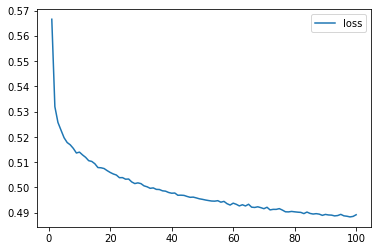

In [69]:
# Create a Dataframe using containing tarining history
history_df = pd.DataFrame(fit_model.history,index=range(1,len(fit_model.history["loss"])+1))

#plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

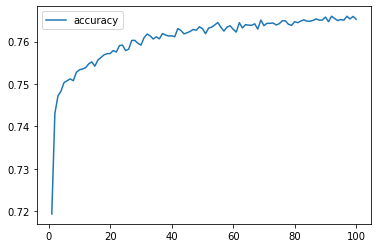

In [70]:
#plot the accuracy
history_df.plot(y="accuracy")

In [71]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5410 - accuracy: 0.7426 - 281ms/epoch - 1ms/step
Loss: 0.5409833788871765, Accuracy: 0.7426239252090454


##### save the model

In [72]:
#Export our model to HDF5 file
nn.save("./Trained_Models/D3AlphabetSoupCharityOptimi2.h5")